In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
def summary_plot(df, pattern="results/weights_{}/summary.csv"):
    if isinstance(df, str):
        df = pd.read_csv(pattern.format(df))

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    df = df[df["stage"] <= 2]
    for stage in df["stage"].unique():
        filtered = df[df["stage"] == stage]
        axs[0].plot(
            filtered["period"], filtered["validation_loss"],
            label="stage " + str(stage))
        axs[1].plot(
            filtered["period"], filtered["training_loss_mean"],
            label="stage " + str(stage))
    axs[0].set_title("Validation Loss")
    axs[0].legend()
    axs[1].set_title("Training Loss")
    axs[1].legend()

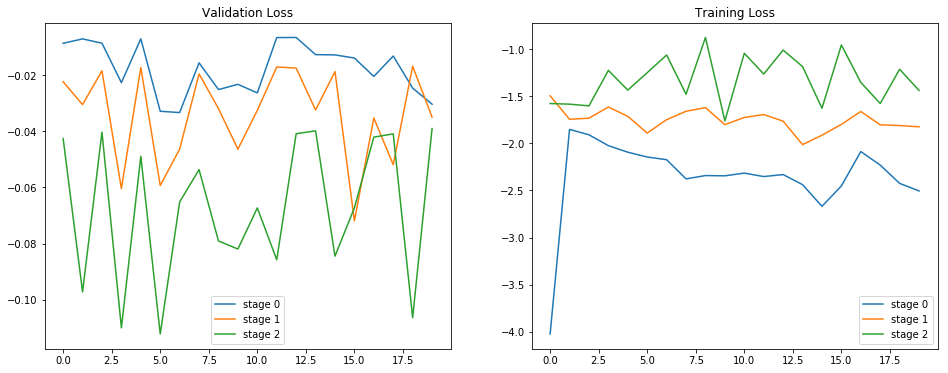

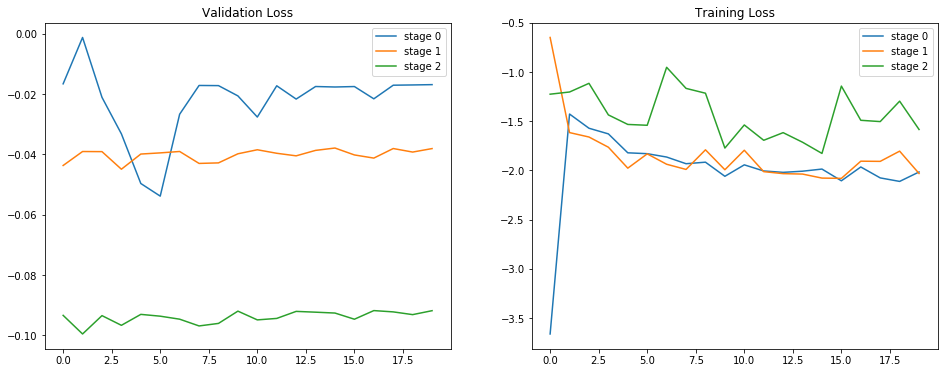

In [4]:
# Batch Size = 32 or Batch Size = 64
summary_plot("imitation_1t_32b")
summary_plot("imitation_1t_64b")

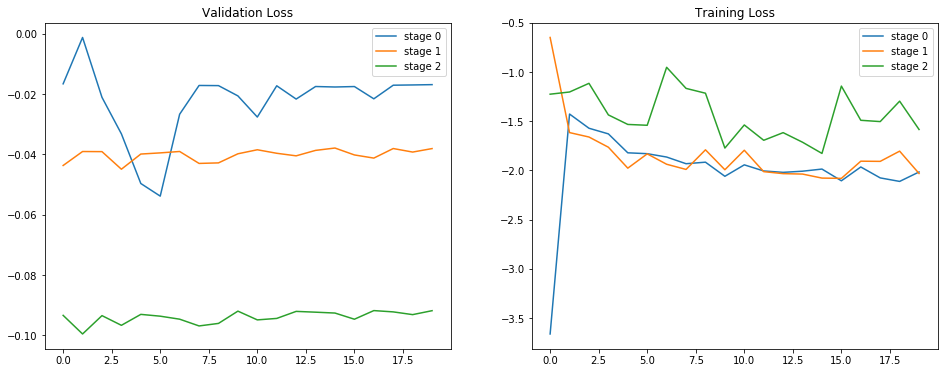

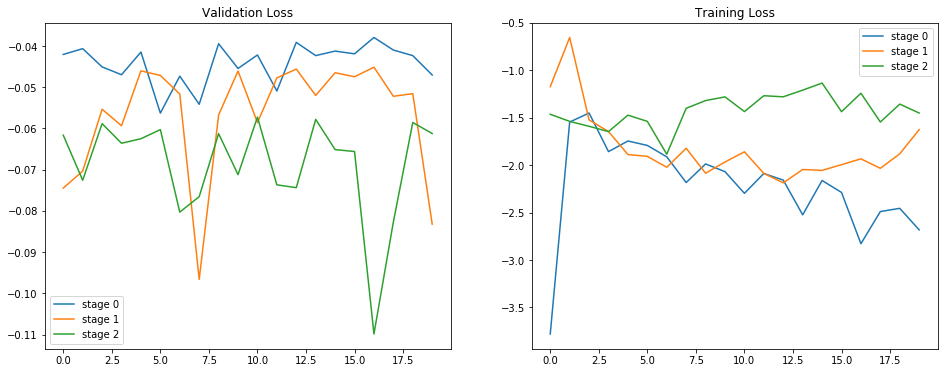

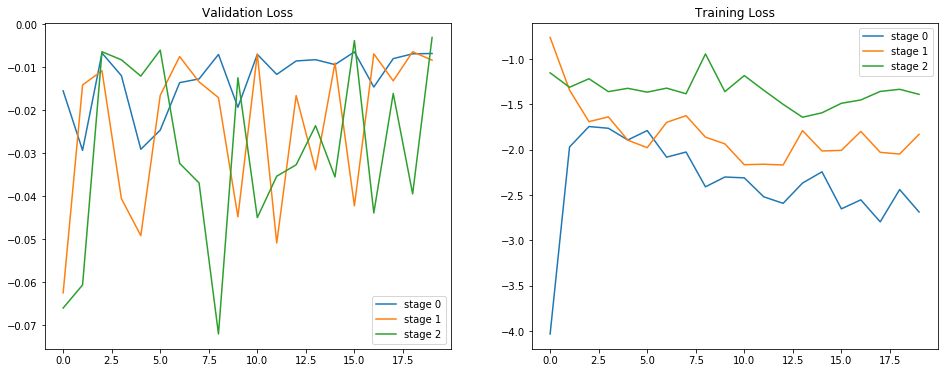

In [10]:
# Longer?
# Depth = 5 epochs, Batch Size = 64; 146 / 2^n unrolls per meta-epoch
summary_plot("imitation_1t_64b")
# Depth = 1 * 2^n epochs, Batch Size = 64; 29 unrolls per meta-epoch
summary_plot("imitation_1t_64b_longer_repeat")
# Depth = 5 * 2^n epochs, Batch Size = 64; 145 unrolls per meta-epoch
summary_plot("imitation_1t_64b_longer")

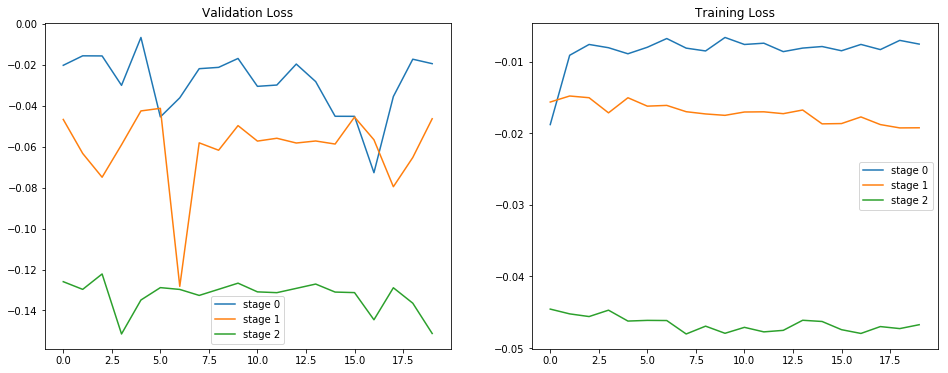

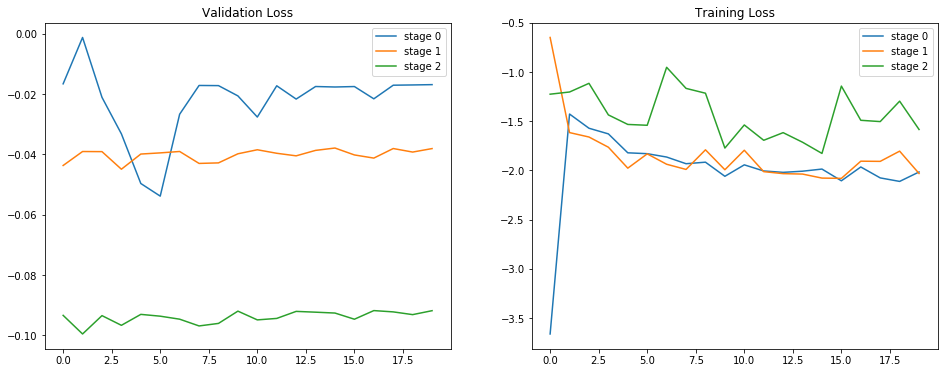

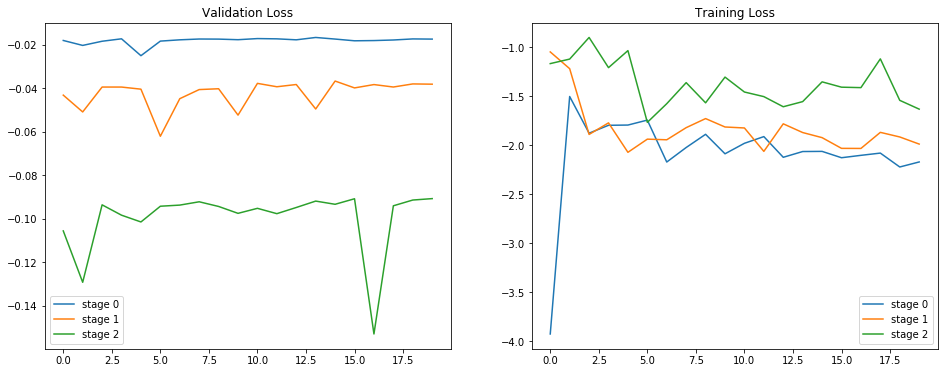

In [8]:
# 0 vs 1 vs 2 teachers
summary_plot("meta_64b")
summary_plot("imitation_1t_64b")
summary_plot("imitation_2t_64b")


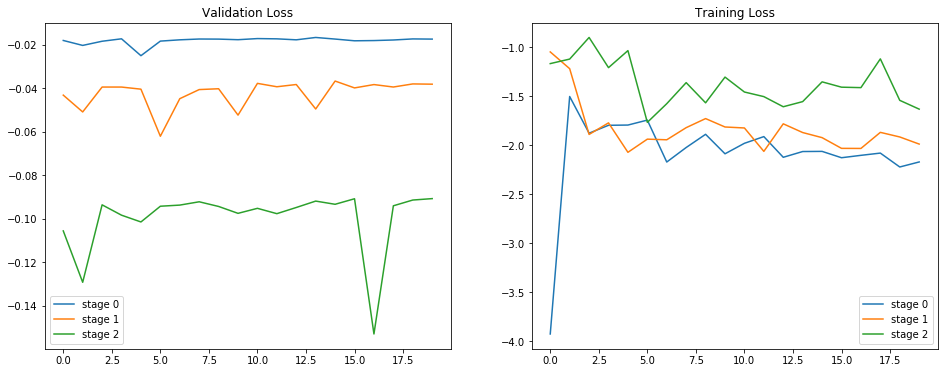

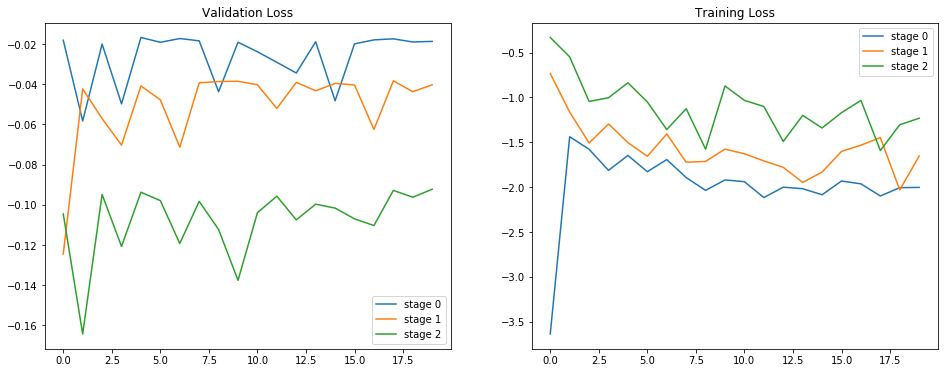

In [7]:
# Mean vs Max
summary_plot("imitation_2t_64b")
summary_plot("imitation_2t_64b_max")